<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,89.515682,1992.898435,2092.414117,-350.289959,2442.704075
1,0.0,1.0,64.062500,2229.574237,2303.636736,-258.602623,2562.239359
2,0.0,2.0,80.732301,-1734.883506,-1644.151205,-318.650505,-1325.500701
3,0.0,3.0,39.652860,-1295.993886,-1246.341026,-170.674328,-1075.666698
4,0.0,4.0,86.346397,2290.654954,2387.001350,-338.873575,2725.874926
...,...,...,...,...,...,...,...
19995,999.0,15.0,30.269571,269.969506,310.239077,414.979447,-104.740370
19996,999.0,16.0,50.873253,1102.478560,1163.351814,1015.393039,147.958774
19997,999.0,17.0,56.104642,2726.522416,2792.627057,1167.841359,1624.785699
19998,999.0,18.0,55.045237,-494.337649,-429.292412,1136.969164,-1566.261576


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    89.515682  1992.898435  2092.414117  -350.289959  2442.704075
      1.0    64.062500  2229.574237  2303.636736  -258.602623  2562.239359
      2.0    80.732301 -1734.883506 -1644.151205  -318.650505 -1325.500701
      3.0    39.652860 -1295.993886 -1246.341026  -170.674328 -1075.666698
      4.0    86.346397  2290.654954  2387.001350  -338.873575  2725.874926
...                ...          ...          ...          ...          ...
999.0 15.0   30.269571   269.969506   310.239077   414.979447  -104.740370
      16.0   50.873253  1102.478560  1163.351814  1015.393039   147.958774
      17.0   56.104642  2726.522416  2792.627057  1167.841359  1624.785699
      18.0   55.045237  -494.337649  -429.292412  1136.969164 -1566.261576
      19.0   71.890202  6041.300637  6123.190839  1627.849643  4495.341195

[20000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    89.515682  1992.898435  2092.414117  -350.289959  2442.704075
      1.0    64.062500  2229.574237  2303.636736  -258.602623  2562.239359
      2.0    80.732301 -1734.883506 -1644.151205  -318.650505 -1325.500701
      3.0    39.652860 -1295.993886 -1246.341026  -170.674328 -1075.666698
      4.0    86.346397  2290.654954  2387.001350  -338.873575  2725.874926
...                ...          ...          ...          ...          ...
999.0 15.0   30.269571   269.969506   310.239077   414.979447  -104.740370
      16.0   50.873253  1102.478560  1163.351814  1015.393039   147.958774
      17.0   56.104642  2726.522416  2792.627057  1167.841359  1624.785699
      18.0   55.045237  -494.337649  -429.292412  1136.969164 -1566.261576
      19.0   71.890202  6041.300637  6123.190839  1627.849643  4495.341195

[20000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,89.515682,1992.898435,2092.414117,-350.289959,2442.704075
1,0.0,1.0,64.062500,2229.574237,2303.636736,-258.602623,2562.239359
2,0.0,2.0,80.732301,-1734.883506,-1644.151205,-318.650505,-1325.500701
3,0.0,3.0,39.652860,-1295.993886,-1246.341026,-170.674328,-1075.666698
4,0.0,4.0,86.346397,2290.654954,2387.001350,-338.873575,2725.874926
...,...,...,...,...,...,...,...
19995,999.0,15.0,30.269571,269.969506,310.239077,414.979447,-104.740370
19996,999.0,16.0,50.873253,1102.478560,1163.351814,1015.393039,147.958774
19997,999.0,17.0,56.104642,2726.522416,2792.627057,1167.841359,1624.785699
19998,999.0,18.0,55.045237,-494.337649,-429.292412,1136.969164,-1566.261576


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    89.515682  1992.898435  2092.414117  -350.289959  2442.704075
      1.0    64.062500  2229.574237  2303.636736  -258.602623  2562.239359
      2.0    80.732301 -1734.883506 -1644.151205  -318.650505 -1325.500701
      3.0    39.652860 -1295.993886 -1246.341026  -170.674328 -1075.666698
      4.0    86.346397  2290.654954  2387.001350  -338.873575  2725.874926
...                ...          ...          ...          ...          ...
999.0 15.0   30.269571   269.969506   310.239077   414.979447  -104.740370
      16.0   50.873253  1102.478560  1163.351814  1015.393039   147.958774
      17.0   56.104642  2726.522416  2792.627057  1167.841359  1624.785699
      18.0   55.045237  -494.337649  -429.292412  1136.969164 -1566.261576
      19.0   71.890202  6041.300637  6123.190839  1627.849643  4495.341195

[20000 rows x 5 columns]

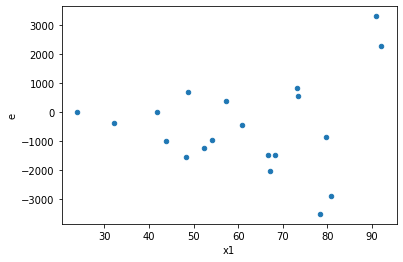

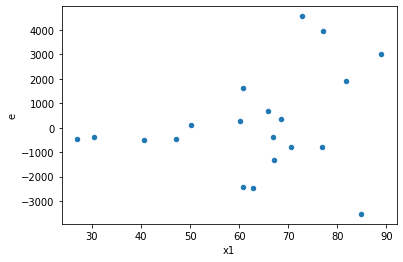

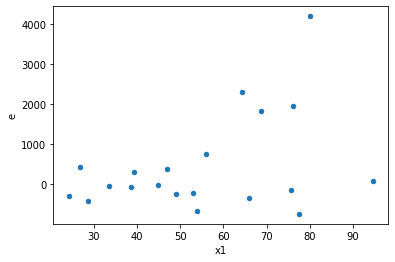

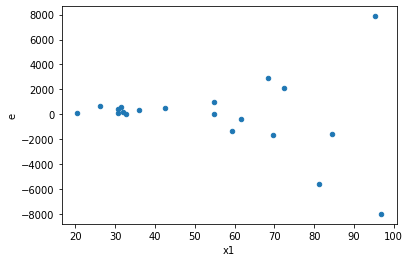

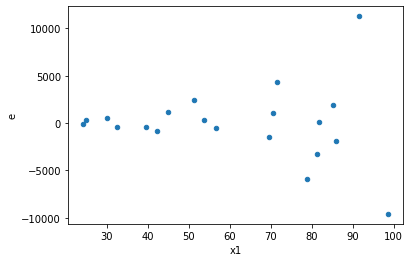

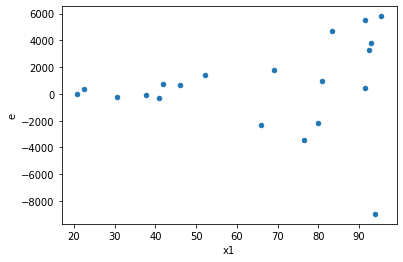

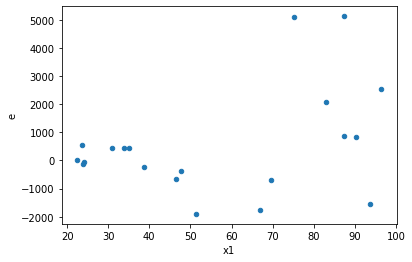

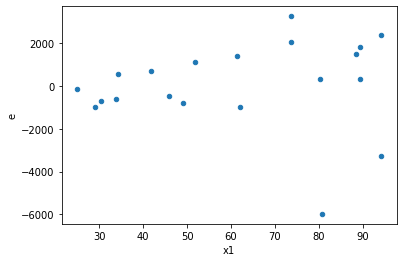

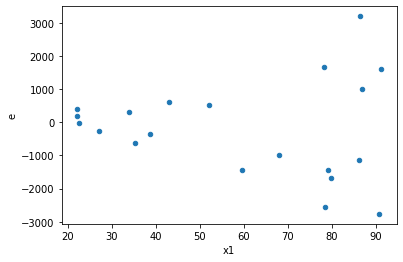

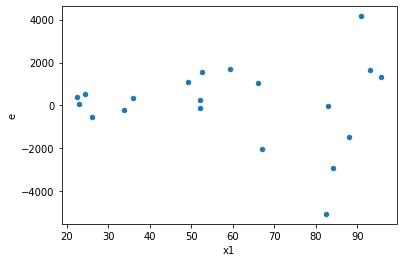

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,11.0,6995709.459084904,87321171.79685739,999387.0655835577,7938288.345168853,7.9431569794567665,0.0028927787133095073,0.9985536106433452,0.0014463893566547537,Reject005=0 : Heteroscedasticity
1.0,10.0,8.0,4953382.528765819,16640816.993898364,495338.2528765819,2080102.1242372955,4.19935692863917,0.05336401422455772,0.9733179928877211,0.02668200711227886,Reject005=1 : Homoscedasticity
2.0,8.0,10.0,2458246.7321149,64690585.816257946,307280.8415143625,6469058.581625795,21.05259328809612,5.367368048081467e-05,0.9999731631597596,2.6836840240407334e-05,Reject005=0 : Heteroscedasticity
4.0,10.0,8.0,2915155.017333941,142950317.64784247,291515.5017333941,17868789.70598031,61.29619042462529,3.7003487742826024e-06,0.9999981498256129,1.8501743871413012e-06,Reject005=0 : Heteroscedasticity
5.0,12.0,6.0,7800217.646661326,71672914.69702384,650018.1372217772,11945485.782837307,18.377157649620585,0.001883070407642462,0.9990584647961788,0.000941535203821231,Reject005=0 : Heteroscedasticity
6.0,3.0,15.0,1963213.966591112,15321256.083844488,654404.6555303707,1021417.0722562992,1.560834055235256,0.4804589725015631,0.7597705137492184,0.24022948625078155,Reject005=1 : Homoscedasticity
9.0,10.0,8.0,3555229.581884048,15766310.61329304,355522.9581884048,1970788.82666163,5.543351790005179,0.023219109627029777,0.9883904451864851,0.011609554813514888,Reject005=0 : Heteroscedasticity
10.0,9.0,9.0,4712324.345773568,29395583.954121843,523591.59397484094,3266175.994902427,6.238022215191196,0.011816609283510138,0.9940916953582449,0.005908304641755069,Reject005=0 : Heteroscedasticity
12.0,11.0,7.0,1808559.985995255,19983802.019487385,164414.54418138682,2854828.859926769,17.36360292297037,0.0009709991146678032,0.9995145004426661,0.0004854995573339016,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,11.0,6995709.459084904,87321171.79685739,999387.0655835577,7938288.345168853,7.9431569794567665,0.0028927787133095073,Reject005=0 : Heteroscedasticity
1.0,10.0,8.0,4953382.528765819,16640816.993898364,495338.2528765819,2080102.1242372955,4.19935692863917,0.05336401422455772,Reject005=1 : Homoscedasticity
2.0,8.0,10.0,2458246.7321149,64690585.816257946,307280.8415143625,6469058.581625795,21.05259328809612,5.367368048081467e-05,Reject005=0 : Heteroscedasticity
3.0,13.0,5.0,95231003.91585234,3985276.357718895,7325461.839680949,797055.2715437791,0.10880614614989159,0.001273817900579509,Reject005=0 : Heteroscedasticity
4.0,10.0,8.0,2915155.017333941,142950317.64784247,291515.5017333941,17868789.70598031,61.29619042462529,3.7003487742826024e-06,Reject005=0 : Heteroscedasticity
5.0,12.0,6.0,7800217.646661326,71672914.69702384,650018.1372217772,11945485.782837307,18.377157649620585,0.001883070407642462,Reject005=0 : Heteroscedasticity
6.0,3.0,15.0,1963213.966591112,15321256.083844488,654404.6555303707,1021417.0722562992,1.560834055235256,0.4804589725015631,Reject005=1 : Homoscedasticity
7.0,12.0,6.0,108274668.48926723,6550647.218750875,9022889.040772269,1091774.5364584792,0.12100054999291383,0.002128143360650604,Reject005=0 : Heteroscedasticity
8.0,6.0,12.0,28361638.276655205,17929103.40056962,4726939.712775867,1494091.9500474685,0.31608017889656387,0.16738720043822833,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    805
Reject005=1 : Homoscedasticity      195
Name: Result_test, dtype: int64